In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
from google.colab import files
data_set = files.upload()

Saving corona_vaccination.csv to corona_vaccination.csv


In [ ]:
df=pd.read_csv('corona_vaccination.csv')

In [ ]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24022 entries, 0 to 24021
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              24022 non-null  object 
 1   iso_code                             24022 non-null  object 
 2   date                                 24022 non-null  object 
 3   total_vaccinations                   13526 non-null  float64
 4   people_vaccinated                    12744 non-null  float64
 5   people_fully_vaccinated              10087 non-null  float64
 6   daily_vaccinations_raw               11202 non-null  float64
 7   daily_vaccinations                   23791 non-null  float64
 8   total_vaccinations_per_hundred       13526 non-null  float64
 9   people_vaccinated_per_hundred        12744 non-null  float64
 10  people_fully_vaccinated_per_hundred  10087 non-null  float64
 11  daily_vaccinations_per_milli

In [ ]:
print('Column Name                  Missing Value:')
df.isnull().sum()

Column Name                  Missing Value:


country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     10496
people_vaccinated                      11278
people_fully_vaccinated                13935
daily_vaccinations_raw                 12820
daily_vaccinations                       231
total_vaccinations_per_hundred         10496
people_vaccinated_per_hundred          11278
people_fully_vaccinated_per_hundred    13935
daily_vaccinations_per_million           231
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [ ]:
df["people_vaccinated"]= df.groupby("country").total_vaccinations.tail(1)
vaccination_country=df.groupby("country")["people_vaccinated"].mean().sort_values(ascending= False).head(30).reset_index()

In [ ]:
vaccination_country

,country,people_vaccinated
0,China,863513000.0
1,United States,306509795.0
2,India,243703242.0
3,Brazil,76758587.0
4,United Kingdom,70253625.0
5,Germany,59038531.0
6,England,59032003.0
7,France,43204513.0
8,Italy,41310662.0
9,Mexico,36430953.0


In [ ]:
fully_vaccinated=df.groupby("country")["people_fully_vaccinated"].max().sort_values(ascending= False).head(20).reset_index()

In [ ]:
fully_vaccinated

,country,people_fully_vaccinated
0,United States,142095530.0
1,India,46287589.0
2,United Kingdom,29165140.0
3,England,24710013.0
4,Brazil,23534567.0
5,Germany,20648461.0
6,Mexico,14747978.0
7,Russia,13992323.0
8,Italy,13872344.0
9,France,13776913.0


In [ ]:
people_vaccinated=vaccination_country.query('country in ["United States","India", "China" , "Bangladesh"]')
fully_vaccinated_sp=fully_vaccinated.query('country in ["United States", "India", "China" , "Bangladesh"]')

In [ ]:
people_vaccinated

,country,people_vaccinated
0,China,863513000.0
1,United States,306509795.0
2,India,243703242.0
26,Bangladesh,10058643.0


In [ ]:
fully_vaccinated_sp

,country,people_fully_vaccinated
0,United States,142095530.0
1,India,46287589.0
18,Bangladesh,4235398.0


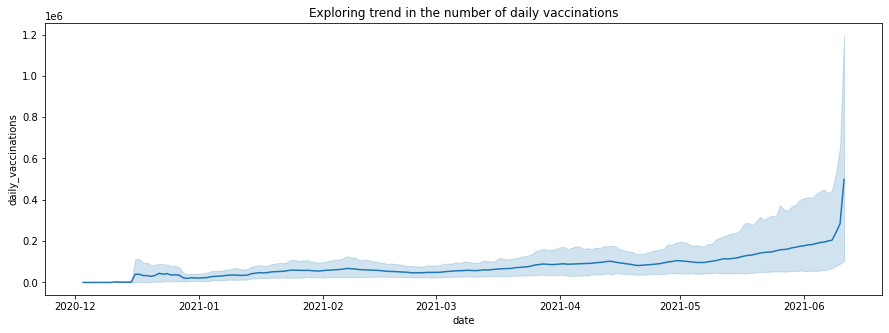

In [ ]:
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "daily_vaccinations",data= df)
plt.title("Exploring trend in the number of daily vaccinations")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



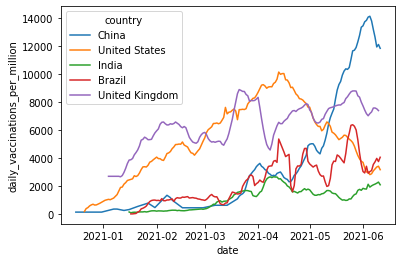

In [ ]:
countries = df.groupby('country')['total_vaccinations'].max().sort_values(ascending= False)[:5].index

top_countries = pd.DataFrame(columns= df.columns)
for country in countries:
    top_countries = top_countries.append(df.loc[df['country'] == country])
sns.lineplot(top_countries['date'], 
             top_countries['daily_vaccinations_per_million'], 
             hue= top_countries['country'], ci= False)

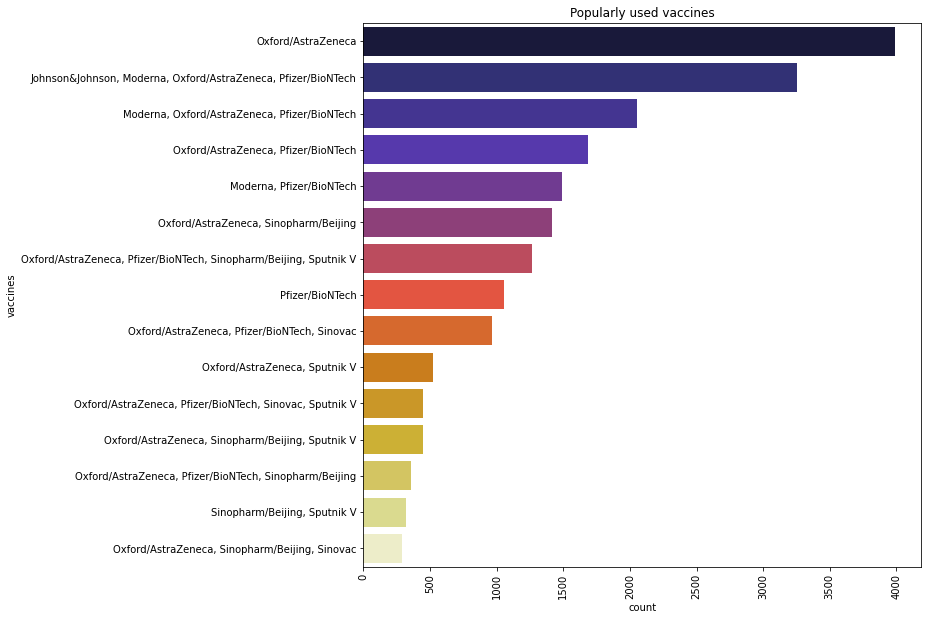

In [ ]:
plt.figure(figsize=[10,10])
sns.countplot(y=df.vaccines,palette='CMRmap',
             order=df['vaccines'].value_counts().head(15).index)
plt.title("Popularly used vaccines")
plt.xticks(rotation=90);

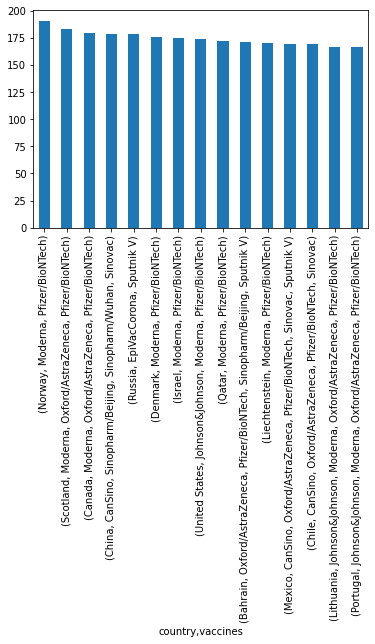

In [ ]:
df.groupby('country')['vaccines'].value_counts().sort_values(ascending=False).head(15).plot(kind='bar')

In [ ]:
ds=df.drop(['country','date','iso_code','vaccines','source_name','source_website'],axis=1)

In [ ]:
ds

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,0.0,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN
1,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
2,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
3,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
4,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0
...,...,...,...,...,...,...,...,...,...
24017,1068107.0,NaN,380786.0,6156.0,8019.0,7.19,4.62,2.56,540.0
24018,1073971.0,NaN,385275.0,5864.0,7699.0,7.23,4.63,2.59,518.0
24019,1078809.0,NaN,389412.0,4838.0,6790.0,7.26,4.64,2.62,457.0
24020,1083983.0,NaN,394063.0,5174.0,6253.0,7.29,4.64,2.65,421.0


In [ ]:
missing_t_v=ds.total_vaccinations.mean()
ds.total_vaccinations=ds.total_vaccinations.fillna(missing_t_v)
missing_p_v=ds.people_vaccinated.mean()
ds.people_vaccinated=ds.people_vaccinated.fillna(missing_p_v)
missing_p_f_v=ds.people_fully_vaccinated.mean()
ds.people_fully_vaccinated=ds.people_fully_vaccinated.fillna(missing_p_f_v)
missing_d_v_r=ds.daily_vaccinations_raw.mean()
ds.daily_vaccinations_raw=ds.daily_vaccinations_raw.fillna(missing_d_v_r)
missing_d_v=ds.daily_vaccinations.mean()
ds.daily_vaccinations=ds.daily_vaccinations.fillna(missing_d_v)
missing_t_v_p_h=ds.total_vaccinations_per_hundred.mean()
ds.total_vaccinations_per_hundred=ds.total_vaccinations_per_hundred.fillna(missing_t_v_p_h)
missing_p_v_p_h=ds.people_vaccinated_per_hundred.mean()
ds.people_vaccinated_per_hundred=ds.people_vaccinated_per_hundred.fillna(missing_p_v_p_h)
missing_p_f_v_p_h=ds.people_fully_vaccinated_per_hundred.mean()
ds.people_fully_vaccinated_per_hundred=ds.people_fully_vaccinated_per_hundred.fillna(missing_p_f_v_p_h)
missing_p_f_v_p_h=ds.people_fully_vaccinated_per_hundred.mean()
ds.people_fully_vaccinated_per_hundred=ds.people_fully_vaccinated_per_hundred.fillna(missing_p_f_v_p_h)
missing_d_v_p_m=ds.daily_vaccinations_per_million.mean()
ds.daily_vaccinations_per_million=ds.daily_vaccinations_per_million.fillna(missing_d_v_p_m)

In [ ]:
ds

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,0.000000e+00,1.115334e+07,2.444937e+06,187830.073201,96099.048296,0.000000,0.000000,8.855075,3243.000673
1,8.177028e+06,1.115334e+07,2.444937e+06,187830.073201,1367.000000,22.456475,15.307577,8.855075,35.000000
2,8.177028e+06,1.115334e+07,2.444937e+06,187830.073201,1367.000000,22.456475,15.307577,8.855075,35.000000
3,8.177028e+06,1.115334e+07,2.444937e+06,187830.073201,1367.000000,22.456475,15.307577,8.855075,35.000000
4,8.177028e+06,1.115334e+07,2.444937e+06,187830.073201,1367.000000,22.456475,15.307577,8.855075,35.000000
...,...,...,...,...,...,...,...,...,...
24017,1.068107e+06,1.115334e+07,3.807860e+05,6156.000000,8019.000000,7.190000,4.620000,2.560000,540.000000
24018,1.073971e+06,1.115334e+07,3.852750e+05,5864.000000,7699.000000,7.230000,4.630000,2.590000,518.000000
24019,1.078809e+06,1.115334e+07,3.894120e+05,4838.000000,6790.000000,7.260000,4.640000,2.620000,457.000000
24020,1.083983e+06,1.115334e+07,3.940630e+05,5174.000000,6253.000000,7.290000,4.640000,2.650000,421.000000


In [ ]:
x=ds.drop(['daily_vaccinations_raw'],axis=1)

In [ ]:
x

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,0.000000e+00,1.115334e+07,2.444937e+06,96099.048296,0.000000,0.000000,8.855075,3243.000673
1,8.177028e+06,1.115334e+07,2.444937e+06,1367.000000,22.456475,15.307577,8.855075,35.000000
2,8.177028e+06,1.115334e+07,2.444937e+06,1367.000000,22.456475,15.307577,8.855075,35.000000
3,8.177028e+06,1.115334e+07,2.444937e+06,1367.000000,22.456475,15.307577,8.855075,35.000000
4,8.177028e+06,1.115334e+07,2.444937e+06,1367.000000,22.456475,15.307577,8.855075,35.000000
...,...,...,...,...,...,...,...,...
24017,1.068107e+06,1.115334e+07,3.807860e+05,8019.000000,7.190000,4.620000,2.560000,540.000000
24018,1.073971e+06,1.115334e+07,3.852750e+05,7699.000000,7.230000,4.630000,2.590000,518.000000
24019,1.078809e+06,1.115334e+07,3.894120e+05,6790.000000,7.260000,4.640000,2.620000,457.000000
24020,1.083983e+06,1.115334e+07,3.940630e+05,6253.000000,7.290000,4.640000,2.650000,421.000000


In [ ]:
y=ds['daily_vaccinations_raw']

In [ ]:
y

0        187830.073201
1        187830.073201
2        187830.073201
3        187830.073201
4        187830.073201
             ...      
24017      6156.000000
24018      5864.000000
24019      4838.000000
24020      5174.000000
24021      5523.000000
Name: daily_vaccinations_raw, Length: 24022, dtype: float64

In [ ]:
from sklearn.model_selection import  train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=12)


In [ ]:
print(xtrain.var())

total_vaccinations                     7.514397e+14
people_vaccinated                      4.798395e+13
people_fully_vaccinated                4.388972e+13
daily_vaccinations                     3.509157e+11
total_vaccinations_per_hundred         4.788593e+02
people_vaccinated_per_hundred          1.742669e+02
people_fully_vaccinated_per_hundred    6.824125e+01
daily_vaccinations_per_million         2.157995e+07
dtype: float64


In [ ]:
scale=StandardScaler(copy=True,with_mean=True,with_std=True)
scale.fit(xtrain)

xtrain_std=scale.transform(xtrain)
xtest_std=scale.transform(xtest)

In [ ]:
print(xtrain_std.var())

1.0


In [ ]:
pca1=PCA(n_components=7,svd_solver='randomized')
pca1.fit(xtrain_std)
xtrain_std_pca=pca1.transform(xtrain_std)
xtest_std_pca=pca1.transform(xtest_std)

**Model implementation**

In [ ]:
#model evaluation
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import model_selection, metrics

In [ ]:
models = [
           ['Lasso: ', Lasso()],
           ['Ridge: ', Ridge()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['SVR:' , SVR(kernel='rbf')],
           ['RandomForest ',RandomForestRegressor()],
           ['ExtraTreeRegressor :',ExtraTreesRegressor()],
           ['GradientBoostingClassifier: ', GradientBoostingRegressor()] ,
         ]

In [ ]:
import time
from math import sqrt
from sklearn.metrics import mean_squared_error

model = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(xtrain, ytrain)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(ytrain,curr_model.predict(xtrain))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(ytest,curr_model.predict(xtest))
    model.append(curr_model_data)

In [ ]:
model

[{'Name': 'Lasso: ',
  'Test_R2_Score': 0.9497038749998647,
  'Train_R2_Score': 0.9309932935313971,
  'Train_Time': 0.15741324424743652},
 {'Name': 'Ridge: ',
  'Test_R2_Score': 0.949703871272297,
  'Train_R2_Score': 0.9309932935320219,
  'Train_Time': 0.0027070045471191406},
 {'Name': 'KNeighborsRegressor: ',
  'Test_R2_Score': 0.9591692472584828,
  'Train_R2_Score': 0.9591703271276962,
  'Train_Time': 0.24167752265930176},
 {'Name': 'SVR:',
  'Test_R2_Score': -0.00020519160741039322,
  'Train_R2_Score': 0.00011632854114762559,
  'Train_Time': 13.124675512313843},
 {'Name': 'RandomForest ',
  'Test_R2_Score': 0.9589106838879898,
  'Train_R2_Score': 0.9936947112709958,
  'Train_Time': 9.32183575630188},
 {'Name': 'ExtraTreeRegressor :',
  'Test_R2_Score': 0.9633698078087027,
  'Train_R2_Score': 0.9999999942299536,
  'Train_Time': 2.532411813735962},
 {'Name': 'GradientBoostingClassifier: ',
  'Test_R2_Score': 0.9582327301581988,
  'Train_R2_Score': 0.9783769599465767,
  'Train_Time': 2

In [ ]:
# Convert list to dataframe
df = pd.DataFrame(model)
df

,Name,Train_Time,Train_R2_Score,Test_R2_Score
0,Lasso:,0.157413,0.930993,0.949704
1,Ridge:,0.002707,0.930993,0.949704
2,KNeighborsRegressor:,0.241678,0.959170,0.959169
3,SVR:,13.124676,0.000116,-0.000205
4,RandomForest,9.321836,0.993695,0.958911
5,ExtraTreeRegressor :,2.532412,1.000000,0.963370
6,GradientBoostingClassifier:,2.490839,0.978377,0.958233


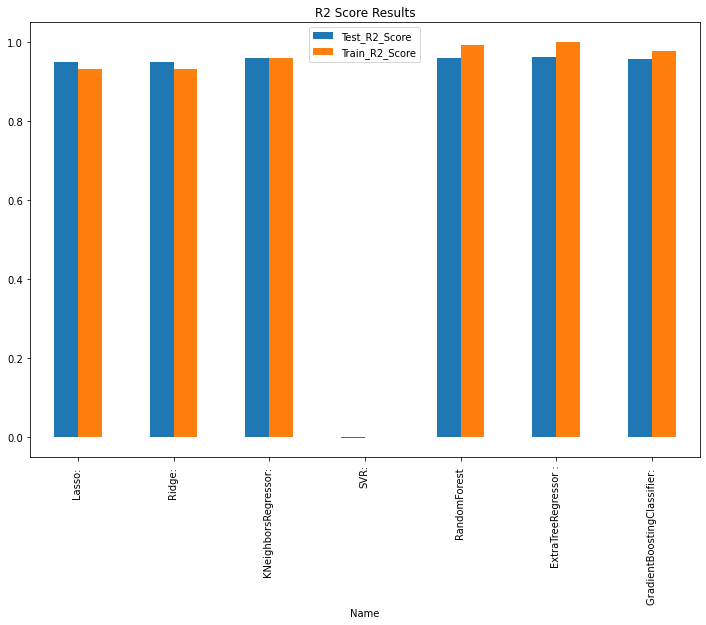

In [ ]:
df.plot(x="Name", y=['Test_R2_Score' , 'Train_R2_Score'], kind="bar" , title = 'R2 Score Results' , figsize= (12,8)) ;